<a href="https://colab.research.google.com/github/ww232330/hateSpeechAutoLabeling/blob/main/autoLabeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.94.230.194:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.94.230.194:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
model = load_model("/content/modelCNNLSTM.h5")
with open("/content/tokenizerCNNLSTM.json") as f:
    tokenizer = tokenizer_from_json(json.load(f))

In [ ]:
def jamo_split(s: str) -> str:
    CHOSUNG_LIST = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    JUNGSUNG_LIST = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ',
                     'ㅣ']
    JONGSUNG_LIST = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ',
                     'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

    s_code = ord(s)

    if '가' <= s <= '힣':
        return CHOSUNG_LIST[(s_code - 0xAC00) // (28 * 21)] \
               + JUNGSUNG_LIST[((s_code - 0xAC00) // 28) % 21] \
               + JONGSUNG_LIST[(s_code - 0xAC00) % 28]
    else:
        return s

In [ ]:
def string_jamo_split(s: str) -> str:
    result = ""
    for i in list(s.strip()):
        result += jamo_split(i)

    return result


# 데이터셋 


In [ ]:
dataset = pd.read_csv("/content/newsCommentSplit0.csv")

In [ ]:
dataset['comment'] = dataset['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
dataset['comment'] = dataset['comment'].replace("", np.nan)
dataset.dropna(inplace=True)
dataset.drop_duplicates(subset=['comment'], inplace=True)
X= dataset['comment']

In [ ]:
X_encoded = []

for i in X:
    X_encoded.append(string_jamo_split(i))

X_encoded = np.array(tokenizer.texts_to_sequences(X_encoded))
X_encoded = pad_sequences(X_encoded, maxlen=500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
X_encoded

array([[ 0,  0,  0, ..., 37, 16,  3],
       [ 0,  0,  0, ...,  6, 13,  4],
       [ 0,  0,  0, ..., 12, 21, 21],
       ...,
       [ 0,  0,  0, ...,  1, 15, 18],
       [ 0,  0,  0, ...,  7, 27,  4],
       [ 0,  0,  0, ...,  3,  5,  4]], dtype=int32)

In [ ]:
y_predict = model.predict(X_encoded)

(array([ 269.,  219.,  280.,  346.,  465.,  707.,  968., 1234., 1351.,
        4151.]),
 array([0.05923182, 0.14842564, 0.23761944, 0.32681325, 0.41600707,
        0.50520086, 0.5943947 , 0.6835885 , 0.7727823 , 0.86197615,
        0.95116997], dtype=float32),
 <a list of 10 Patch objects>)

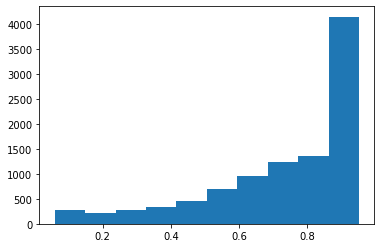

In [ ]:
plt.hist(y_predict)

In [ ]:
y_predict[:20]

array([[0.28892463],
       [0.7715573 ],
       [0.92307734],
       [0.7454224 ],
       [0.78164744],
       [0.55345327],
       [0.9232629 ],
       [0.11812019],
       [0.89549387],
       [0.92407566],
       [0.9224493 ],
       [0.9074918 ],
       [0.92504096],
       [0.9177755 ],
       [0.75965476],
       [0.92117286],
       [0.94103634],
       [0.84131706],
       [0.9250678 ],
       [0.920243  ]], dtype=float32)

In [ ]:
X[:20]

0                                  우리에게 북한은 꼭 없애야 할 적일뿐
1                      문재앙 탄핵 원하면 추천 눌러주세요 여론의 힘을 보여줍시다
2                           김정은이 트럼프를 개호구 문재인으로 착각했나봄ㅋㅋ
3                                     부칸이 밑장빼기하다가 딱 걸렸군
4                북한 욕하면 친일이란 그딴 사고방식은 김일성 종합대학에서 배웠니 ㅋㅋ
5                            처음부터 북한은 비핵화할 생각이 없다고 보았는데
6      ㅋㅋㅋ 북한 핵돼지 시간 넘게 개고생하면서 기차 타고 왔는데 트럼프가 빅엿 날리네ㅋㅋㅋ
7                                    문모씨의 북한팔이도 이제 끝이네요
8             뻔하지머 트럼프 비핵화 플랜 내놔라 김정은 우선 경제 제재부터 풀어달라 끝
9             문재인 작살났네 개성공단 개박살났네 금강산 불났네 남북철도연결은 폭탄맞았네
10                                          속보  문재인 통곡중
11    애초부터 북한은 핵 동결로 핵보유국 인정받고 미국과 평화협정체결하고 그명분으로 주한...
12                     조지자 문재인이랑 공산당 들 문재앙 지금 개똥줄타겠넼ㅋㅋㅋ
13                              달창 좌좀들 단체멘붕ㅋㅋ어 이게 아닌데ㅋㅋ
14    보나마나 핵보유하고 종전선언 해달라했겠지 그러면 한국도 베트남처럼 공산화될꺼 뻔한데...
15    이래도 문재인은 안변해 진짜 최악이지 김정은은 죽어도 안변하고 그를 신봉하는 문재인...
16    네들황교안대행은 천운이 따르는 사람이야국무총리 인사청문회때 황교안만큼은 절대 안된다...
17                                        ㅋㅋ는 왜 

In [ ]:
dataset['label_proba'] = y_predict

In [ ]:
dataset[:20]

,comment,label_proba
0,우리에게 북한은 꼭 없애야 할 적일뿐,0.288925
1,문재앙 탄핵 원하면 추천 눌러주세요 여론의 힘을 보여줍시다,0.771557
2,김정은이 트럼프를 개호구 문재인으로 착각했나봄ㅋㅋ,0.923077
3,부칸이 밑장빼기하다가 딱 걸렸군,0.745422
4,북한 욕하면 친일이란 그딴 사고방식은 김일성 종합대학에서 배웠니 ㅋㅋ,0.781647
5,처음부터 북한은 비핵화할 생각이 없다고 보았는데,0.553453
6,ㅋㅋㅋ 북한 핵돼지 시간 넘게 개고생하면서 기차 타고 왔는데 트럼프가 빅엿 날리네ㅋㅋㅋ,0.923263
7,문모씨의 북한팔이도 이제 끝이네요,0.118120
8,뻔하지머 트럼프 비핵화 플랜 내놔라 김정은 우선 경제 제재부터 풀어달라 끝,0.895494
9,문재인 작살났네 개성공단 개박살났네 금강산 불났네 남북철도연결은 폭탄맞았네,0.924076


In [ ]:
dataset.loc['label'] = 2

In [ ]:
dataset.loc[dataset.label_proba >= 0.9, 'label'] = 1

In [ ]:
dataset.loc[dataset.label_proba <= 0.3, 'label'] = 0

In [ ]:
dataset[:20]

,comment,label_proba,label
0,우리에게 북한은 꼭 없애야 할 적일뿐,0.288925,0.0
1,문재앙 탄핵 원하면 추천 눌러주세요 여론의 힘을 보여줍시다,0.771557,2.0
2,김정은이 트럼프를 개호구 문재인으로 착각했나봄ㅋㅋ,0.923077,1.0
3,부칸이 밑장빼기하다가 딱 걸렸군,0.745422,2.0
4,북한 욕하면 친일이란 그딴 사고방식은 김일성 종합대학에서 배웠니 ㅋㅋ,0.781647,2.0
5,처음부터 북한은 비핵화할 생각이 없다고 보았는데,0.553453,2.0
6,ㅋㅋㅋ 북한 핵돼지 시간 넘게 개고생하면서 기차 타고 왔는데 트럼프가 빅엿 날리네ㅋㅋㅋ,0.923263,1.0
7,문모씨의 북한팔이도 이제 끝이네요,0.118120,0.0
8,뻔하지머 트럼프 비핵화 플랜 내놔라 김정은 우선 경제 제재부터 풀어달라 끝,0.895494,2.0
9,문재인 작살났네 개성공단 개박살났네 금강산 불났네 남북철도연결은 폭탄맞았네,0.924076,1.0


In [ ]:
index = dataset[dataset['label']==2].index
labeled_dataset = dataset.drop(index)

In [ ]:
labeled_dataset.drop(['label_proba'], axis=1, inplace=True)

In [ ]:
labeled_dataset[:20]

,comment,label
0,우리에게 북한은 꼭 없애야 할 적일뿐,0.0
2,김정은이 트럼프를 개호구 문재인으로 착각했나봄ㅋㅋ,1.0
6,ㅋㅋㅋ 북한 핵돼지 시간 넘게 개고생하면서 기차 타고 왔는데 트럼프가 빅엿 날리네ㅋㅋㅋ,1.0
7,문모씨의 북한팔이도 이제 끝이네요,0.0
9,문재인 작살났네 개성공단 개박살났네 금강산 불났네 남북철도연결은 폭탄맞았네,1.0
10,속보 문재인 통곡중,1.0
11,애초부터 북한은 핵 동결로 핵보유국 인정받고 미국과 평화협정체결하고 그명분으로 주한...,1.0
12,조지자 문재인이랑 공산당 들 문재앙 지금 개똥줄타겠넼ㅋㅋㅋ,1.0
13,달창 좌좀들 단체멘붕ㅋㅋ어 이게 아닌데ㅋㅋ,1.0
15,이래도 문재인은 안변해 진짜 최악이지 김정은은 죽어도 안변하고 그를 신봉하는 문재인...,1.0


In [ ]:
labeled_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3622 entries, 0 to label
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  3622 non-null   object 
 1   label    3622 non-null   float64
dtypes: float64(1), object(1)
memory usage: 244.9+ KB


# 결과

In [ ]:
labeled_dataset.to_csv("labledComment0.csv", index=False)